<a href="https://colab.research.google.com/github/dheemanthAthreya/6thSem-ML-Lab/blob/main/Lab_10/1BM22CS347_Lab10_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

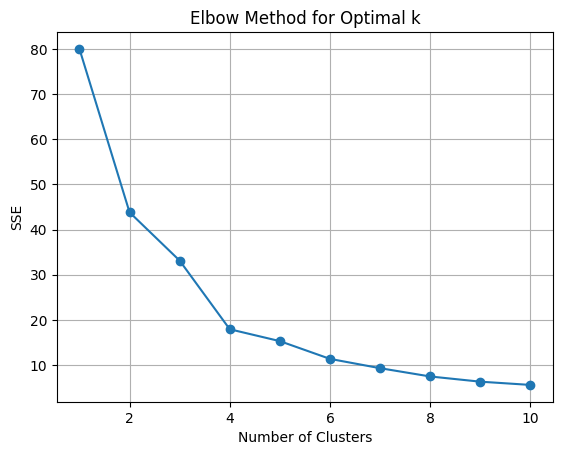

Predicted cluster labels for test data: [2 2 2 1 0 2 0 2 1 2]


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("income_kmeans.csv")

# Drop non-numeric column
X = df.drop(columns=["Name"])

# Split into training and testing
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Perform scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Plot SSE vs number of clusters
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_scaled)
    sse.append(kmeans.inertia_)

plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

# Fit model with chosen k (let's pick 3 as an example)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train_scaled)

# Predict clusters for test data
predicted_clusters = kmeans.predict(X_test_scaled)

# Since there's no ground truth, we can't calculate accuracy in the traditional sense,
# but we can display the predicted cluster labels
print("Predicted cluster labels for test data:", predicted_clusters)


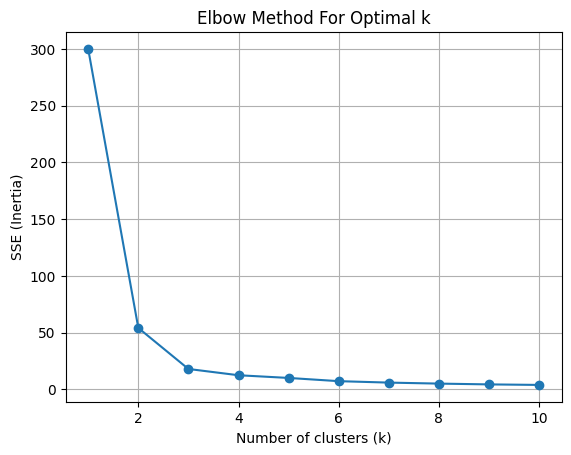

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Step 1: Load dataset and select petal length and width
iris = load_iris()
X = iris.data[:, 2:4]  # Petal length and petal width

# Step 2: Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Elbow Method
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

# Plotting SSE vs. Number of Clusters
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE (Inertia)')
plt.grid(True)
plt.show()
